# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     984.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.03e-41
Time:                        17:54:41   Log-Likelihood:                 1.1929
No. Observations:                  50   AIC:                             5.614
Df Residuals:                      46   BIC:                             13.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8771      0.084     58.090      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.34928746  4.84706479  5.3043449   5.69316281  5.99564599  6.20695068
  6.3360578   6.40429733  6.44184389  6.48275914  6.55939554  6.69708093
  6.90995724  7.19865699  7.5501994   7.94012311  8.33650503  8.70520532
  9.0154764   9.24501468  9.38362506  9.43489585  9.41560931  9.3529843
  9.28020437  9.23096572  9.23394107  9.3080688   9.45944141  9.68030453
  9.95033099 10.23996048 10.51525622 10.7434807  10.89847434 10.96495345
 10.9410213  10.83847972 10.68089012 10.49970241 10.32908787 10.2003249
 10.13666005 10.14948874 10.23648294 10.38197373 10.55952561 10.73627981
 10.87835288 10.95640364]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93651493 10.78083713 10.50949311 10.16834042  9.81774371  9.51779535
  9.31360278  9.22424457  9.23809936  9.31569117]


## Plot comparison

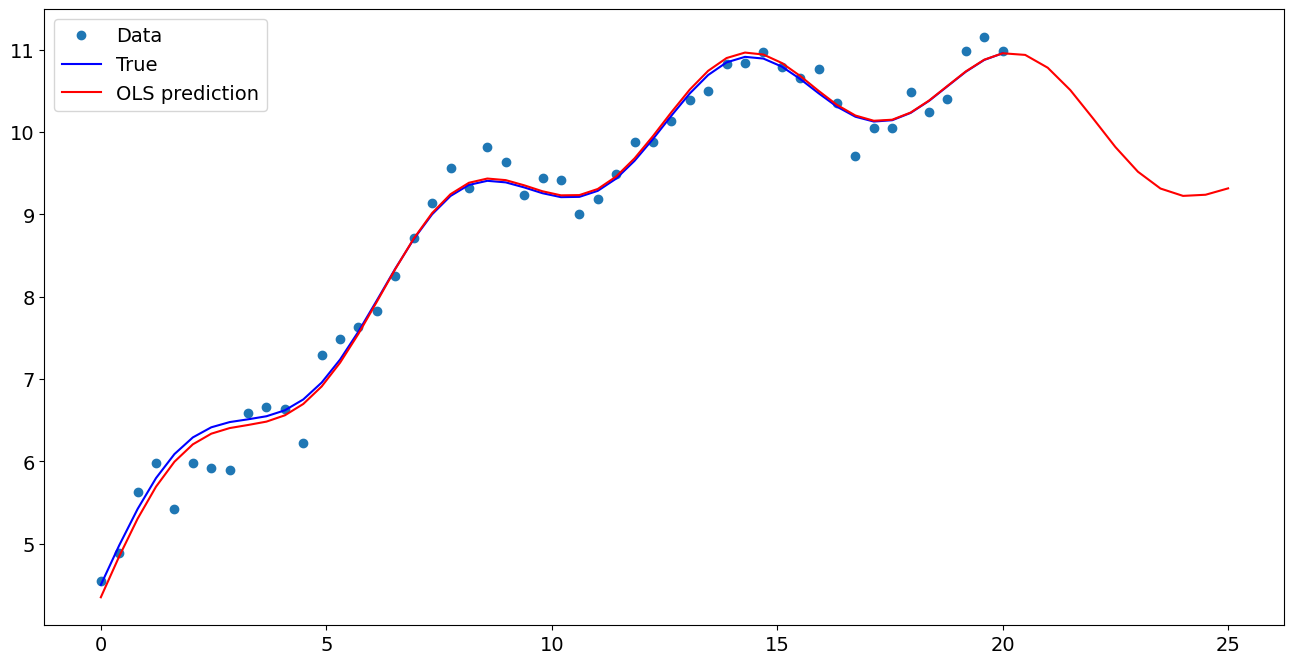

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.877089
x1                  0.518054
np.sin(x1)          0.513127
I((x1 - 5) ** 2)   -0.021112
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.936515
1    10.780837
2    10.509493
3    10.168340
4     9.817744
5     9.517795
6     9.313603
7     9.224245
8     9.238099
9     9.315691
dtype: float64